# Exercise 1: Classification of handwritten digits using an MLP

In this exercise, you will train a multi-layer perceptron (MLP) to classify handwritten digits from the MNIST dataset. The MNIST dataset consists of 28x28 grayscale images of handwritten digits (0 to 9). The task is to classify each image into one of the 10 classes (one for each digit).

For this exercise, you will not need to write any code. All you need to do is follow along!

## Step 1: Load the dataset

We obtain the MNIST dataset using scikit-learn.

Training set size: 60000
Test set size: 10000


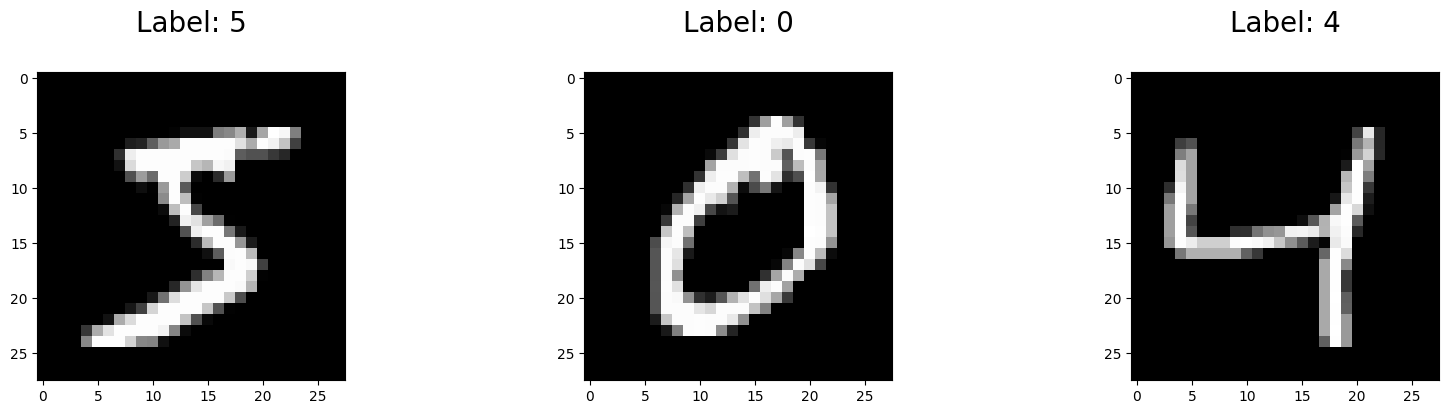

In [1]:
# Load MNIST using sklearn.datasets.fetch_openml

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml

# Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, parser="auto")

# Split into train and test
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

# Convert to numpy arrays and scale for the model
X_train = np.array(X_train) / 255
X_test = np.array(X_test) / 255
y_train = np.array(y_train, dtype=np.int8)
y_test = np.array(y_test, dtype=np.int8)

# Show the first 3 images
plt.figure(figsize=(20, 4))
for index, (image, label) in enumerate(zip(X_train[0:3], y_train[0:3])):
    plt.subplot(1, 3, index + 1)
    plt.imshow(np.reshape(image, (28, 28)), cmap=plt.cm.gray)
    plt.title("Label: %s\n" % label, fontsize=20)

## Step 2: Create and train a Multi-Layer Perceptron

We will use `sklearn.neural_network` to build a Multi-Layer Perceptron in a single command. We'll train it using a second command!

In [2]:
# Train an MLP classifier using sklearn.neural_network.MLPClassifier

from sklearn.neural_network import MLPClassifier

# Create an MLPClassifier object
mlp = MLPClassifier(
    hidden_layer_sizes=(50,),
    max_iter=10,
    alpha=1e-4,
    solver="sgd",
    verbose=10,
    random_state=1,
    learning_rate_init=0.1,
)


# Train the MLPClassifier
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.32009978
Iteration 2, loss = 0.15347534
Iteration 3, loss = 0.11544755
Iteration 4, loss = 0.09279764
Iteration 5, loss = 0.07889367
Iteration 6, loss = 0.07170497
Iteration 7, loss = 0.06282111
Iteration 8, loss = 0.05530788
Iteration 9, loss = 0.04960484
Iteration 10, loss = 0.04645355


/opt/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=10,
              random_state=1, solver='sgd', verbose=10)

## Step 3: Evaluate the model on a hold-out dataset

We will assess the performance of the model on data that was not used for training. In this case, we had separated out data into training and test splits, so we will show the accuracy for each.

In [ ]:
# Show the accuracy on the training and test sets

print(f"Training set score: {mlp.score(X_train, y_train)}")
print(f"Test set score: {mlp.score(X_test, y_test)}")

Lastly, even though metrics are important to look it, it's always a good idea to look directly at your data to catch any problems or bugs you might have missed.

In [ ]:
# Show the images, predictions, and original labels for 10 images

# Get the predictions for the test dataset
predictions = mlp.predict(X_test)

# Show the predictions in a grid
plt.figure(figsize=(8, 4))

for index, (image, prediction, label) in enumerate(
    zip(X_test[0:10], predictions[0:10], y_test[0:10])
):
    plt.subplot(2, 5, index + 1)
    plt.imshow(np.reshape(image, (28, 28)), cmap=plt.cm.gray)

    # Green if correct, red if incorrect
    fontcolor = "g" if prediction == label else "r"
    plt.title(
        "Prediction: %i\n Label: %i" % (prediction, label), fontsize=10, color=fontcolor
    )

    plt.axis("off")  # hide axes